In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

In [2]:
data = pd.read_csv("AVR1_dataset.csv", sep=";")

In [3]:
data.head()

,DateTime,Смертей за день,Заражений за день,Выздоровлений за день
0,2020-01-22 00:00:00,17,557,30.0
1,2020-01-23 00:00:00,1,100,2.0
2,2020-01-24 00:00:00,8,287,7.0
3,2020-01-25 00:00:00,16,493,3.0
4,2020-01-26 00:00:00,14,683,14.0


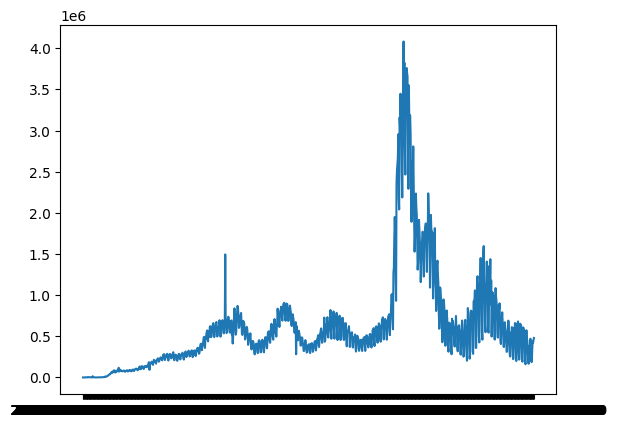

In [4]:
data_cut = data[:]
plt.plot(data_cut['DateTime'], data_cut['Заражений за день'])

In [5]:
spectra = np.fft.fft(data_cut['Заражений за день'])
a = (spectra.real**2 + spectra.imag**2)**(1/2)
theta = np.angle(spectra)

### **Аппроксимация через Фурье**

Text(0.5, 1.0, 'Прирост по дням')

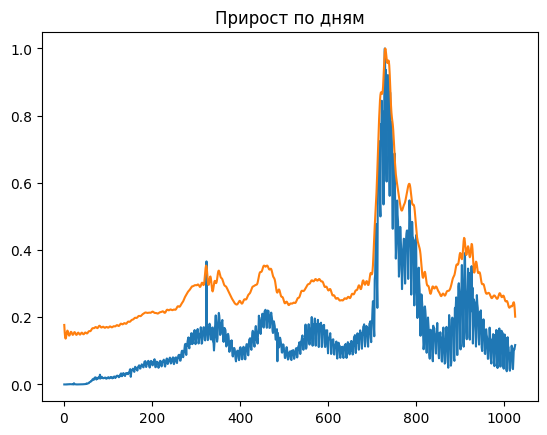

In [6]:
new_x = range(1,len(data_cut['DateTime'])+1)
new_y = np.zeros(data_cut['Заражений за день'].shape)
fd = 1 / np.mean(np.diff(new_x))
for i in range(int(len(new_y) / 8)):
    new_y += np.cos(2 * np.pi * fd/len(new_y) * i * new_x  + theta[i]) * a[i]
plt.plot(new_x, data_cut['Заражений за день']/max( data_cut['Заражений за день']))
plt.plot(new_x,new_y/max(new_y))
plt.title("Прирост по дням")

In [7]:
fd

1.0

In [8]:
data_cut['Заражений за день']

0          557
1          100
2          287
3          493
4          683
         ...  
1020    324713
1021    435570
1022    422818
1023    453968
1024    479528
Name: Заражений за день, Length: 1025, dtype: int64

### **Аппроксимация через полином:**

C:\Users\Ivan-\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Прирост по дням')

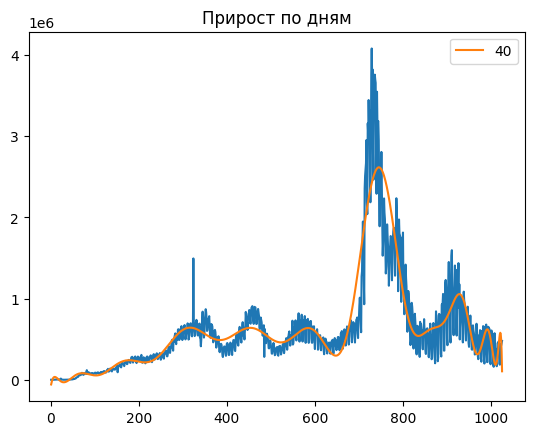

In [9]:
plt.plot(new_x, data_cut['Заражений за день'])
ys = []
for deg in [40]:
    z = np.polyfit(new_x, data_cut['Заражений за день'], deg)
    p = np.poly1d(z)
    new_y = p(new_x)
    plt.plot(new_x, new_y, label=deg)
plt.legend()
plt.title("Прирост по дням")

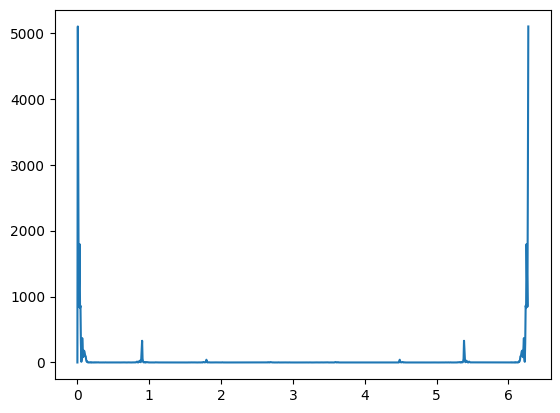

In [10]:
dat = data_cut['Заражений за день'] - np.mean(data_cut['Заражений за день'])
dat = dat / np.max(dat)
spectra = np.fft.fft(dat)
dens = np.abs(spectra)**2
f = np.asarray([2*np.pi * fd/len(dat) * i for i in range(int(len(dat)))])
plt.plot(f, dens)

### **Выделим высокочастотный пик отдельно**

(0.8, 1.0)

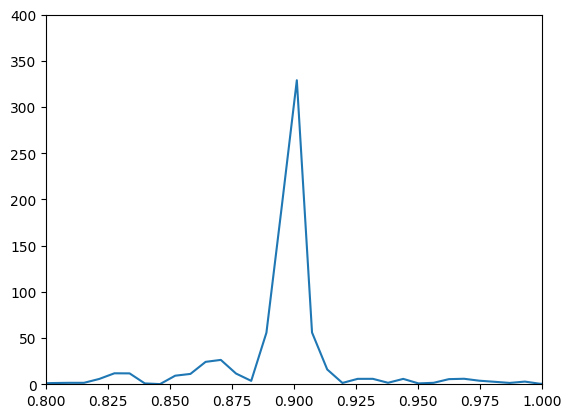

In [11]:
plt.plot(f,dens)
plt.ylim(0,400)
plt.xlim(0.8,1)

In [12]:
deriv = np.polyder(p)
deriv2 = np.polyder(deriv)

In [13]:
deriv

poly1d([-1.69326293e-103,  5.54776211e-100, -3.32155311e-097,
       -4.05898236e-094,  5.95214520e-092,  3.76604237e-088,
        2.79368511e-085, -5.67082637e-083, -3.09807252e-079,
       -2.90502057e-076, -4.64595120e-074,  2.14881394e-070,
        2.95501758e-067,  1.46987032e-064, -1.04922224e-061,
       -2.60510204e-058, -1.99591866e-055,  2.21581596e-053,
        2.12620828e-049,  2.02166404e-046,  1.74446699e-045,
       -1.88610658e-040, -1.65809088e-037,  4.61483790e-035,
        1.86093535e-031,  6.21423051e-029, -1.45511894e-025,
       -9.18243259e-023,  1.29839225e-019,  5.03179993e-017,
       -1.44542826e-013,  1.03764650e-010, -4.12707197e-008,
        1.03249324e-005, -1.67386021e-003,  1.73758983e-001,
       -1.10339366e+001,  3.91635491e+002, -6.51573931e+003,
        3.43327800e+004])

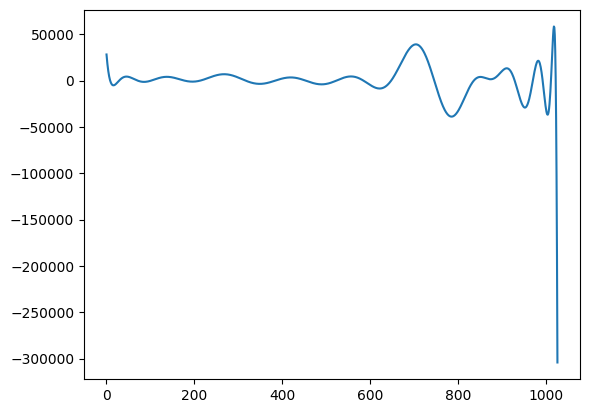

In [14]:
new_y = deriv(new_x)
plt.plot(new_x, new_y, label=deg)

In [15]:
roots=np.roots(deriv)
roots

array([-958.60089367 +98.17716836j, -958.60089367 -98.17716836j,
       -918.93282643+290.92470277j, -918.93282643-290.92470277j,
       -840.53701589+472.89905847j, -840.53701589-472.89905847j,
       -725.24466123+637.02023599j, -725.24466123-637.02023599j,
       -575.6731458 +776.311166j  , -575.6731458 -776.311166j  ,
       -395.01897832+883.77302004j, -395.01897832-883.77302004j,
       -186.60746741+951.97458317j, -186.60746741-951.97458317j,
         47.31008975+971.67290418j,   47.31008975-971.67290418j,
        310.62882161+926.01605279j,  310.62882161-926.01605279j,
       1021.09364571  +0.j        , 1010.33442728  +0.j        ,
        991.41641305  +0.j        ,  969.14770472  +0.j        ,
        927.90601413  +0.j        ,  874.00362127  +9.96714291j,
        874.00362127  -9.96714291j,  835.11441695  +0.j        ,
        745.25650964  +0.j        ,  647.42198705  +0.j        ,
        584.40501333  +0.j        ,  522.96079357  +0.j        ,
        453.11932127  +0.

In [16]:
real_valued = roots.real[abs(roots.imag)==0]
extremums = real_valued[real_valued>0]
indexes = np.array([index for index,value in enumerate(roots) if (value.imag == 0)*(value.real>0)])

In [17]:
deriv2

poly1d([-6.60372543e-102,  2.10814960e-098, -1.22897465e-095,
       -1.46123365e-092,  2.08325082e-090,  1.28045441e-086,
        9.21916085e-084, -1.81466444e-081, -9.60402480e-078,
       -8.71506171e-075, -1.34732585e-072,  6.01667904e-069,
        7.97854746e-066,  3.82166284e-063, -2.62305560e-060,
       -6.25224489e-057, -4.59061291e-054,  4.87479511e-052,
        4.46503739e-048,  4.04332808e-045,  3.31448728e-044,
       -3.39499185e-039, -2.81875450e-036,  7.38374063e-034,
        2.79140302e-030,  8.69992272e-028, -1.89165462e-024,
       -1.10189191e-021,  1.42823147e-018,  5.03179993e-016,
       -1.30088543e-012,  8.30117204e-010, -2.88895038e-007,
        6.19495945e-005, -8.36930105e-003,  6.95035931e-001,
       -3.31018098e+001,  7.83270981e+002, -6.51573931e+003])

In [18]:
indexes2 = np.array([index for index,value in enumerate(deriv2) if value>0])

In [19]:
answer=np.array(extremums[np.array([index for index,value in enumerate(np.in1d(indexes,indexes2)) if value==True])],dtype=int)

In [20]:
answer

array([1021, 1010,  991,  835,  584,  522,  384,  213,  102,   29])

### **Пики заболеваемости:**

In [21]:
data_cut['DateTime'][answer]

1021    2022-11-08 00:00:00
1010    2022-10-28 00:00:00
991     2022-10-09 00:00:00
835     2022-05-06 00:00:00
584     2021-08-28 00:00:00
522     2021-06-27 00:00:00
384     2021-02-09 00:00:00
213     2020-08-22 00:00:00
102     2020-05-03 00:00:00
29      2020-02-20 00:00:00
Name: DateTime, dtype: object